Library Imports

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

<!-- first question -->
1st question

In [23]:
def monte_carlo_integral(rng, N=1000):
    f = lambda x, y: np.sin(np.pi / 2 * (x + y))
    I = 0

    for _ in range(N):
        x, y = rng.random(), rng.random()
        I += f(x, y)
    return I / N

class simple_lcg:
    def __init__(self, seed, a=69069, m=(2**31) - 1, b=23375):
        self.seed = seed
        self.a = a
        self.m = m
        self.b = b
    def random(self):
        self.seed = (self.a * self.seed + self.b) % self.m
        return float(self.seed) / self.m

print(monte_carlo_integral(simple_lcg(12345), N=10000000))

0.8108484022315875


2nd question

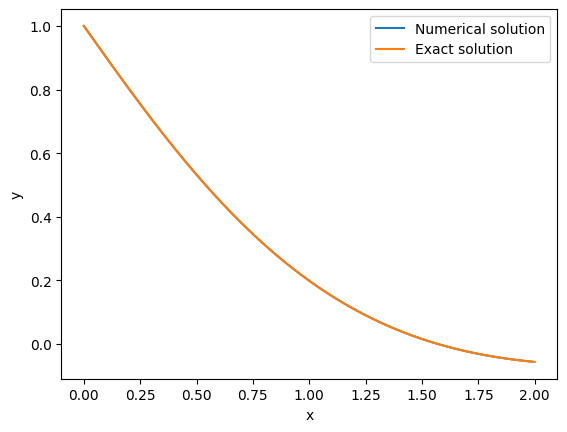

xi = 0.0, yi = 1.0, yi exact = 1.0
xi = 0.01, yi = 0.9900003333333334, yi exact = 0.99000033167
xi = 0.02, yi = 0.9800026434, yi exact = 0.9800026401066646
xi = 0.03, yi = 0.9700088706999833, yi exact = 0.9700088658099656
xi = 0.04, yi = 0.960020916533148, yi exact = 0.9600209100797424
xi = 0.05, yi = 0.9500406433989778, yi exact = 0.950040635415442
xi = 0.06, yi = 0.9400698753960807, yi exact = 0.9400698659156228
xi = 0.07, yi = 0.9301103986213883, yi exact = 0.9301103876771549
xi = 0.08, yi = 0.9201639615689741, yi exact = 0.9201639491940384
xi = 0.09, yi = 0.9102322755284196, yi exact = 0.910232261755771
xi = 0.1, yi = 0.9003170149826617, yi exact = 0.900316999845194
xi = 0.11, yi = 0.8904198180052477, yi exact = 0.8904198015357488
xi = 0.12, yi = 0.8805422866569351, yi exact = 0.8805422688880764
xi = 0.13, yi = 0.8706859873815681, yi exact = 0.8706859683458946
xi = 0.14, yi = 0.8608524514011685, yi exact = 0.8608524311310888
xi = 0.15, yi = 0.8510431751101769, yi exact = 0.85104315

In [25]:
def f(t, y):
    return np.array([y[1], -2*y[1] - 2*y[0]])

def exact_sol(t):
    return np.exp(-t) * np.cos(t)

def rk3(t, h, y, f):
    k0 = h * f(t, y)
    k1 = h * f(t + h / 3, y + k0 / 3)
    k2 = h * f(t + 2 * h / 3, y + 2 * k1 / 3)
    return y + 1 / 4 * k0 + 3 / 4 * k2

y0 = np.array([1, -1])
t0 = 0
h = 0.01
t_final = 2

t_values = np.arange(t0, t_final, h)
y_values = np.zeros((len(t_values), 2))
y_values[0] = y0

for i in range(len(t_values) - 1):
    y_values[i+1] = rk3(t_values[i], h, y_values[i], f)

plt.plot(t_values, y_values[:, 0], label='Numerical solution')

t_exact = np.linspace(t0, t_final, 1000)
y_exact = exact_sol(t_exact)
plt.plot(t_exact, y_exact, label='Exact solution')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

for i in range(len(t_values)):
    print(f"xi = {t_values[i]}, yi = {y_values[i, 0]}, yi exact = {exact_sol(t_values[i])}")


3rd question

In [26]:
def f(A, N):
    res = np.identity(len(A))
    
    for i in range(1, N+1):
        res += np.linalg.matrix_power(A, i) / np.math.factorial(i)
    
    return res

A = np.array([[1, 2], [3, 4]])

N = 20
print("Result from our function:\n", f(A, N))

print("Result from scipy's expm function:\n", expm(A))

Result from our function:
 [[ 51.89526846  74.65271975]
 [111.95271292 163.15845668]]
Result from scipy's expm function:
 [[ 51.9689562   74.73656457]
 [112.10484685 164.07380305]]


C:\Users\thivy\AppData\Local\Temp\ipykernel_40468\2224944024.py:5: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  res += np.linalg.matrix_power(A, i) / np.math.factorial(i)


In [27]:

A = np.ones((3, 3))*2
N = 20
print("Result from our function:\n", f(A, N))

print("Result from scipy's expm function:\n", expm(A))

Result from our function:
 [[135.14273549 134.14273549 134.14273549]
 [134.14273549 135.14273549 134.14273549]
 [134.14273549 134.14273549 135.14273549]]
Result from scipy's expm function:
 [[135.14293116 134.14293116 134.14293116]
 [134.14293116 135.14293116 134.14293116]
 [134.14293116 134.14293116 135.14293116]]


C:\Users\thivy\AppData\Local\Temp\ipykernel_40468\2224944024.py:5: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  res += np.linalg.matrix_power(A, i) / np.math.factorial(i)
